## 1、拟合二次函数

已知模型 y=ax+b，输入浮点数 a,b 并生成加噪后的数据，再利用梯度下降算法迭代得到 a,b。利用的到模型对数据拟合并进行预测，记录误差，并绘制出拟合效果。

### 使用梯度下降算法

In [140]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [141]:
a = 3.5
b = 4.0

In [142]:
x = torch.linspace(0,100,dtype=torch.float32)
rand = torch.randn(100)*10
y = a*x+b+rand

In [143]:
train_x = x[:90]
test_x = x[90:]
train_y = y[:90]
test_y = y[90:]

In [144]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

torch.Size([90]) torch.Size([90])
torch.Size([10]) torch.Size([10])


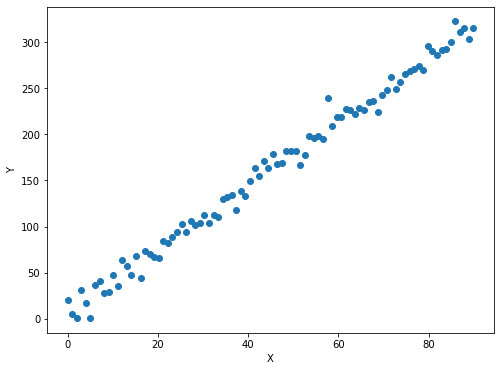

In [145]:
# 绘制训练集图像

plt.figure(figsize=(8,6))
plt.plot(train_x.data.numpy(), train_y.data.numpy(),"o")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

i= 0 loss: tensor(27738.9023)
i= 200 loss: tensor(90.5883)
i= 400 loss: tensor(90.4101)
i= 600 loss: tensor(90.2355)
i= 800 loss: tensor(90.0644)
i= 1000 loss: tensor(89.8967)
i= 1200 loss: tensor(89.7325)
i= 1400 loss: tensor(89.5715)
i= 1600 loss: tensor(89.4138)
i= 1800 loss: tensor(89.2592)
i= 2000 loss: tensor(89.1077)
i= 2200 loss: tensor(88.9593)
i= 2400 loss: tensor(88.8140)
i= 2600 loss: tensor(88.6715)
i= 2800 loss: tensor(88.5319)


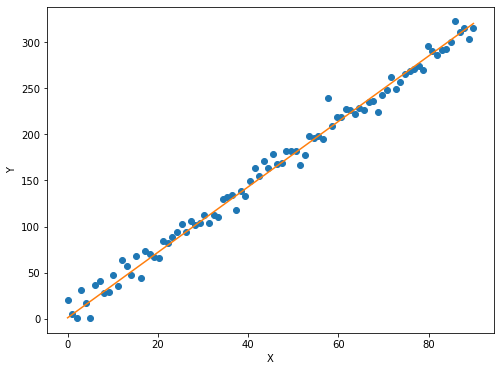

In [146]:
# 模型训练
# 分别用m和n来拟合a和b

m = torch.rand(1, requires_grad=True)
n = torch.rand(1, requires_grad=True)
lr = 0.0001
epoch_num = 3000
losses = []

for i in range(epoch_num):
    pred = m.expand_as(train_x)*train_x+n.expand_as(train_x)
    loss = torch.mean((pred-train_y)**2)
    if i%200==0:
        print("i=", i, "loss:", loss.data)
        losses.append(loss.data)
    loss.backward()
    m.data = m.data-m.grad.data*lr
    n.data = n.data-n.grad.data*lr
    m.grad.data.zero_()
    n.grad.data.zero_()

plt.figure(figsize=(8,6))
plt.plot(train_x.data.numpy(), train_y.data.numpy(),"o")
plt.plot(train_x.data.numpy(), m.data.numpy()*train_x.data.numpy()+n.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

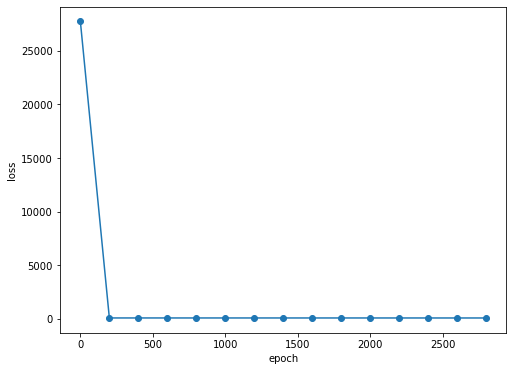

In [147]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [200*i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

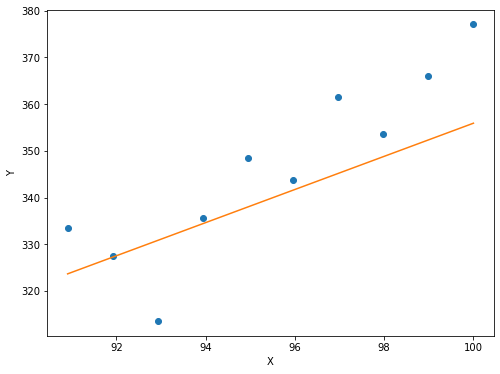

In [148]:
# 测试集

pred = m.expand_as(test_x) + n.expand_as(test_x)

plt.figure(figsize=(8,6))
plt.plot(test_x.data.numpy(), test_y.data.numpy(),"o")
plt.plot(test_x.data.numpy(), m.data.numpy()*test_x.data.numpy()+n.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

查看参数预测的结果，发现模型在拟合截距b时误差较大且不稳定，这和生成噪声的随机性有关

In [149]:
# 查看参数预测的结果

print("true: ", a,b)
print("pred: ", m,n)

true:  3.5 4.0
pred:  tensor([3.5481], requires_grad=True) tensor([1.1062], requires_grad=True)


### 使用神经网络

In [150]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [151]:
class myModel(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1,1)

    def forward(self, x):
        x = self.linear1(x)
        return x

In [152]:
net = myModel()
print(net)

myModel(
  (linear1): Linear(in_features=1, out_features=1, bias=True)
)


In [153]:
loss_fn = nn.MSELoss()
opt = torch.optim.SGD(net.parameters(), lr=0.0001)

loss:  tensor(44512.2500)
loss:  tensor(91.6148)
loss:  tensor(91.5647)
loss:  tensor(91.5149)
loss:  tensor(91.4653)
loss:  tensor(91.4159)
loss:  tensor(91.3669)
loss:  tensor(91.3180)
loss:  tensor(91.2694)
loss:  tensor(91.2211)
loss:  tensor(91.1730)
loss:  tensor(91.1251)
loss:  tensor(91.0775)
loss:  tensor(91.0302)
loss:  tensor(90.9830)
loss:  tensor(90.9361)
loss:  tensor(90.8895)
loss:  tensor(90.8431)
loss:  tensor(90.7969)
loss:  tensor(90.7509)


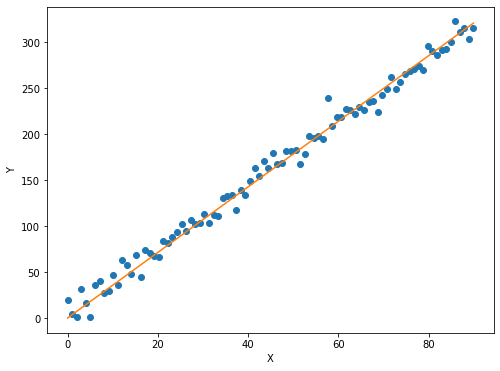

In [154]:
epoch_num = 1000
losses = []

for i in range(epoch_num):
    pred = net(train_x.view(-1,1))
    loss = loss_fn(pred, train_y.view(-1,1))
    if i%50==0:
        print("loss: ", loss.data)
        losses.append(loss.data)
    opt.zero_grad()
    loss.backward()
    opt.step()

pred = net(train_x.view(-1,1))

plt.figure(figsize=(8,6))
plt.plot(train_x.data.numpy(), train_y.data.numpy(),"o")
plt.plot(train_x.data.numpy(), pred.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

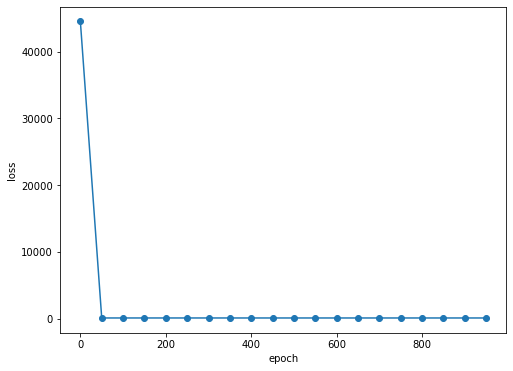

In [155]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [50*i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

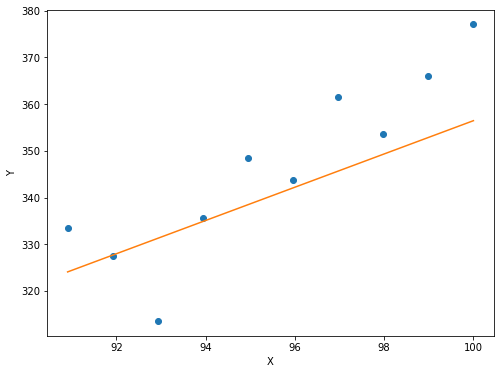

In [156]:
# 测试集

plt.figure(figsize=(8,6))
plt.plot(test_x.data.numpy(), test_y.data.numpy(),"o")
plt.plot(test_x.data.numpy(), net(test_x.view(-1,1)).data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## 拟合三次函数

已知模型 y=ax^3+b^x2+cx+d，输入浮点数 a,b,c,d 生成加噪后的数据，再利用梯度下降算法迭代得到相关参数。利用的到模型对数据拟合并进行预测，记录误差，并绘制出拟合效果。

### 梯度下降法

In [157]:
# 设定参数

a = 1.5
b = 1.5
c = 3.0
d = 2.0

In [158]:
x2 = torch.linspace(start=0,end=10,steps=100,dtype=torch.float32)
rand = torch.randn(100)*10
y2 = a*x2*x2*x2 + b*x2*x2 + c*x2 + d + rand

In [159]:
train_x2 = x2[:90]
test_x2 = x2[90:]
train_y2 = y2[:90]
test_y2 = y2[90:]

In [160]:
print(train_x2.shape, train_y2.shape)
print(test_x2.shape, test_y2.shape)

torch.Size([90]) torch.Size([90])
torch.Size([10]) torch.Size([10])


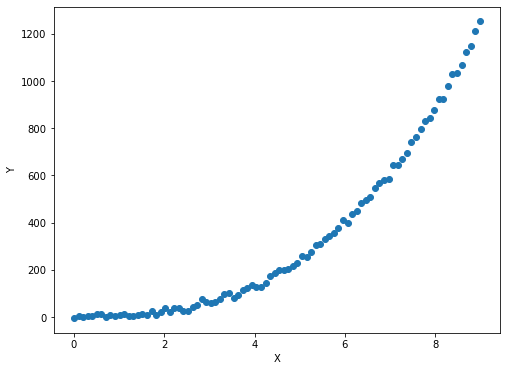

In [161]:
# 绘制训练集图像

plt.figure(figsize=(8,6))
plt.plot(train_x2, train_y2,"o")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

i= 0 loss: tensor(177343.0938)
i= 200 loss: tensor(165.8240)
i= 400 loss: tensor(145.0924)
i= 600 loss: tensor(130.1172)
i= 800 loss: tensor(119.2997)
i= 1000 loss: tensor(111.4853)
i= 1200 loss: tensor(105.8402)
i= 1400 loss: tensor(101.7627)
i= 1600 loss: tensor(98.8173)
i= 1800 loss: tensor(96.6892)
i= 2000 loss: tensor(95.1519)
i= 2200 loss: tensor(94.0414)
i= 2400 loss: tensor(93.2390)
i= 2600 loss: tensor(92.6594)
i= 2800 loss: tensor(92.2404)
i= 3000 loss: tensor(91.9377)
i= 3200 loss: tensor(91.7187)
i= 3400 loss: tensor(91.5606)
i= 3600 loss: tensor(91.4462)
i= 3800 loss: tensor(91.3633)
i= 4000 loss: tensor(91.3033)
i= 4200 loss: tensor(91.2599)
i= 4400 loss: tensor(91.2284)
i= 4600 loss: tensor(91.2055)
i= 4800 loss: tensor(91.1888)
i= 5000 loss: tensor(91.1766)
i= 5200 loss: tensor(91.1676)
i= 5400 loss: tensor(91.1610)
i= 5600 loss: tensor(91.1561)
i= 5800 loss: tensor(91.1523)
i= 6000 loss: tensor(91.1497)
i= 6200 loss: tensor(91.1474)
i= 6400 loss: tensor(91.1457)
i= 660

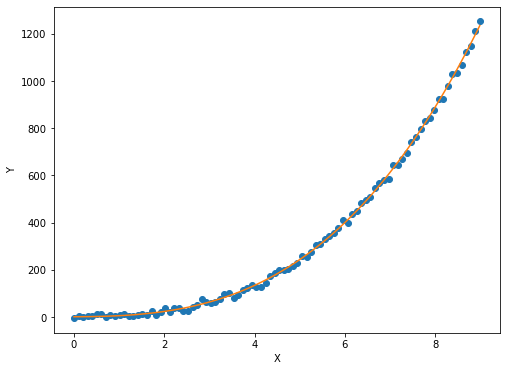

In [162]:
# 模型训练
# 分别用a1 b1 c1 d1来拟合参数a b c d

a1 = torch.rand(1, requires_grad=True)
b1 = torch.rand(1, requires_grad=True)
c1 = torch.rand(1, requires_grad=True)
d1 = torch.rand(1, requires_grad=True)
lr = 0.00001
epoch_num = 10000
losses = []

for i in range(epoch_num):
    pred = a1*train_x2*train_x2*train_x2+b1*train_x2*train_x2 + c1*train_x2 + d1
    loss = torch.mean((pred-train_y2)**2)
    if i%200==0:
        print("i=", i, "loss:", loss.data)
        losses.append(loss.data)
    loss.backward()
    a1.data = a1.data-a1.grad.data*lr
    b1.data = b1.data-b1.grad.data*lr
    c1.data = c1.data-c1.grad.data*lr
    d1.data = d1.data-d1.grad.data*lr
    a1.grad.data.zero_()
    b1.grad.data.zero_()
    c1.grad.data.zero_()
    d1.grad.data.zero_()

final_pred =  a1*train_x2*train_x2*train_x2+b1*train_x2*train_x2 + c1*train_x2 + d1
plt.figure(figsize=(8,6))
plt.plot(train_x2.data.numpy(), train_y2.data.numpy(),"o")
plt.plot(train_x2.data.numpy(), final_pred.data.numpy(),"-")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

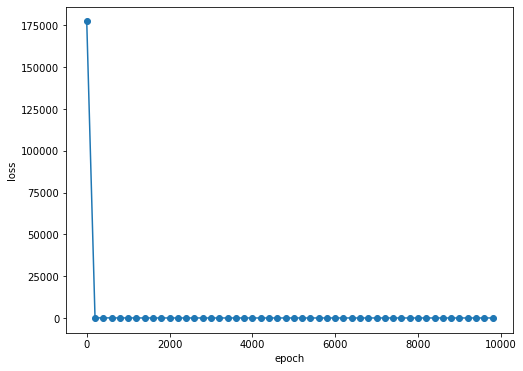

In [163]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [200*i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

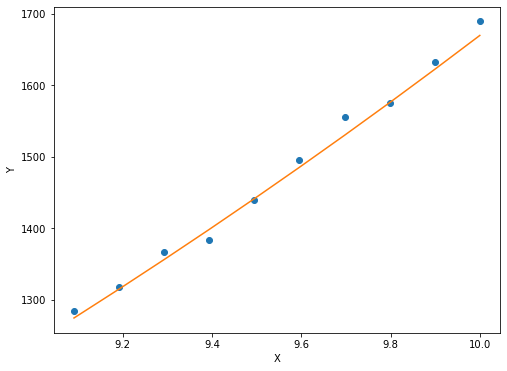

In [164]:
# 测试集

pred = a1*test_x2*test_x2*test_x2 + b1*test_x2*test_x2 + c1*test_x2 + d1

plt.figure(figsize=(8,6))
plt.plot(test_x2.data.numpy(), test_y2.data.numpy(),"o")
plt.plot(test_x2.data.numpy(), pred.data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [165]:
# 查看预测值

print("true: ",a,b,c,d)
print("predict: ", a1.data, b1.data, c1.data ,d1.data)

true:  1.5 1.5 3.0 2.0
predict:  tensor([1.4112]) tensor([2.5206]) tensor([0.5595]) tensor([0.9219])


### 神经网络方法

In [166]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

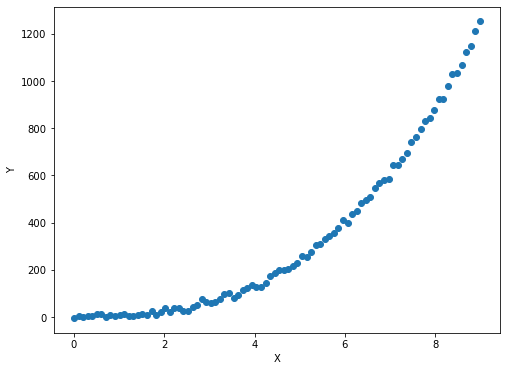

In [178]:
plt.figure(figsize=(8,6))
plt.plot(train_x2.data.numpy(), train_y2.data.numpy(),"o")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [184]:
class myModel2(nn.Module):

    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(1,5)
        self.linear2 = nn.Linear(5,10)
        self.linear3 = nn.Linear(10,5)
        self.linear4 = nn.Linear(5,1)

    def forward(self, x):
        x = self.linear1(x)
        x = F.relu(x)
        x = self.linear2(x)
        x = F.relu(x)
        x = self.linear3(x)
        x = F.relu(x)
        x = self.linear4(x)
        return x

In [190]:
net2 = myModel2()
print(net2)

myModel2(
  (linear1): Linear(in_features=1, out_features=5, bias=True)
  (linear2): Linear(in_features=5, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=5, bias=True)
  (linear4): Linear(in_features=5, out_features=1, bias=True)
)


In [191]:
loss_fn = nn.MSELoss()
#opt = torch.optim.SGD(net2.parameters(), lr=0.001)
opt = torch.optim.Adam(net2.parameters(), lr = 0.001) # 这里用Adam作为优化函数是因为用SGD做实验的过程中很容易陷入局部最小值

loss:  tensor(237595.2188)
loss:  tensor(29553.2695)
loss:  tensor(10641.7373)
loss:  tensor(2657.9043)
loss:  tensor(714.4904)
loss:  tensor(379.8895)
loss:  tensor(225.1439)
loss:  tensor(160.7056)
loss:  tensor(152.6814)
loss:  tensor(150.3140)


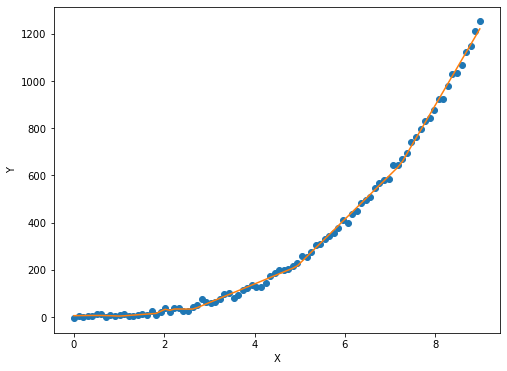

In [192]:
epoch_num = 10000
losses = []

for i in range(epoch_num):

    pred = net2(train_x2.view(-1,1))
    loss = loss_fn(pred, train_y2.view(-1,1))

    if i%1000==0:
        print("loss: ", loss.data)
        losses.append(loss.data)
        
    opt.zero_grad()
    loss.backward()
    opt.step()

plt.figure(figsize=(8,6))
plt.plot(train_x2.data.numpy(), train_y2.data.numpy(),"o")
plt.plot(train_x2.data.numpy(), net2(train_x2.view(-1,1)).data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

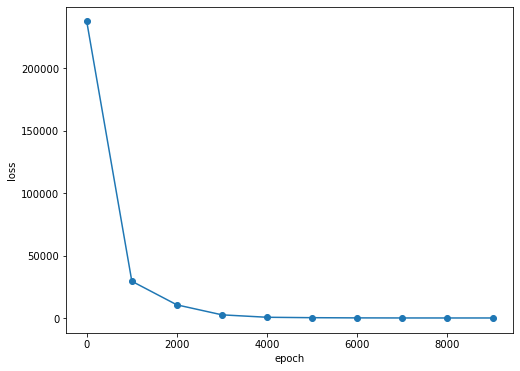

In [193]:
# 绘制训练loss曲线

step = len(losses)
losses_x = [1000*i for i in range(step)]

plt.figure(figsize=(8,6))
plt.plot(losses_x, losses,"-o")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

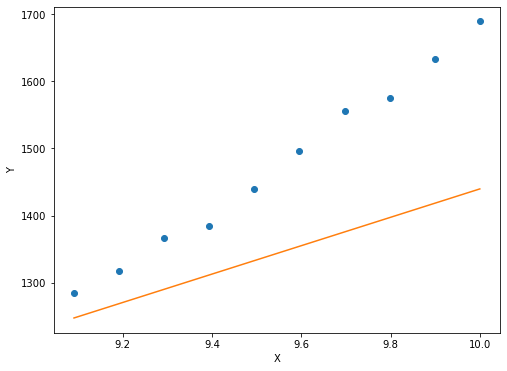

In [194]:
# 测试集

plt.figure(figsize=(8,6))
plt.plot(test_x2.data.numpy(), test_y2.data.numpy(),"o")
plt.plot(test_x2.data.numpy(), net2(test_x2.view(-1,1)).data.numpy())
plt.xlabel("X")
plt.ylabel("Y")
plt.show()